In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('/content/gender_submission.csv')

In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0


In [7]:
x=df.iloc[:, :-1]  #all columns except last
y=df.iloc[:, -1]   #last column

In [8]:
import numpy as np

In [9]:
x=np.array(x).reshape(-1, 1)
y=np.array(y).reshape(-1, 1)

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2,random_state=42
)
print("Training sample:",x_train.shape)
print("testing sample:",x_test.shape)

Training sample: (334, 1)
testing sample: (84, 1)


In [11]:
from sklearn.svm import SVC

In [12]:
svm_linear = SVC(kernel='linear', class_weight='balanced')

In [13]:
svm_linear.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(class_weight='balanced', kernel='linear')

In [14]:
y_pred=svm_linear.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [17]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.5238095238095238


In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print("Confusion Matrix:")
print("TP FP")
print("FN TN")
print(cm)


Confusion Matrix:
TP FP
FN TN
[[18 16]
 [24 26]]


In [19]:
precision = precision_score(y_test,y_pred, zero_division=0)
print("Precision:",precision)

Precision: 0.42857142857142855


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

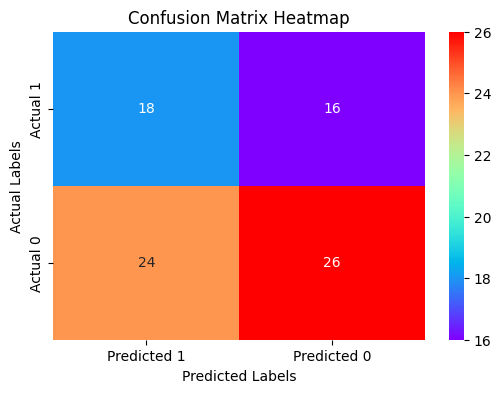

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='rainbow',
            xticklabels=['Predicted 1', 'Predicted 0'],
            yticklabels=['Actual 1', 'Actual 0'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()